## Kaggle Competition | Titanic Machine Learning from Disaster

* background
    + killing 1502 out of 2224 passengers and crew.some groups of people were more likely to survive than others, such as women, children, and the upper-class.泰坦尼克号中一个经典的场面就是豪华游艇倒了，大家都惊恐逃生，可是救生艇的数量有限，不可能让大家都同时获救，这时候副船长发话了：lady and kid first！这并不是一个随意安排的逃生顺序，而是某些人有优先逃生的特权，比如贵族，女人，小孩的。
 
*  goal
    + analysis and  predict which passengers survived the tragedy.给出一些船员的个人信息以及存活状况，让参赛者根据这些信息训练出合适的模型并预测其他人的存活状况
    
* evalution
    + $precision=\frac{\sum_{i=1}^NI(\hat{y}_i==y_i)}{N}$

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).



#### Data Handling
*   Importing Data with Pandas
    + numpy.ndarray vs. pandas.DataFrame 
    + df = pd.read_csv('file_name')#don't have to create DataFrame

*   Some Info of Data
    + df.head(10)
    + df.info()
    + type(df)
    + df.dtypes
    + df.describe()
    + df.columns
    ......
*   属性相关性分析http://rangerwolf.iteye.com/blog/2074614
    + Pclass and Fare
*   Cleaning Data
    + Transform string value of 'male' and 'female' in Sex columns to binary integer.
    + Missing value: Replace the missing value of Age with median or mean age of Pclass which the people belong to.
    + Before trainning: transform the DataFrame to numpy.ndarray
    + Transform categorical columns to dummy values
*   Feature engineering
    + Title
    + Age*Pclass (年龄越大，生存率越低，而三等舱在下面，在三等舱的乘客其存活率也比较低，因此这两个特征相乘可以作为存活率的指标。）
    + Family Sixe（是单个人逃生容易，还是一家人容易呢？）可以统计下家庭大小与存活率的关系。
    + Deck(Cabin)
    + Fare_Per_Person
    
    + Attibute proportional(属性百分比），男性所占的比例，一等仓乘客所占的比例。
    + 其它的一些特征抽取方法：取Log,两个特征的相乘。
    
*   +是否要对属性进行Normalization呢？z-score normalization ,min-max normalization.对数据点进行K-MEANS聚类这个肯定是要归一化的，因为要计算
    \点到簇心的欧拉距离，如果不归一化的话，那么方差大的属性会占据主导作用。
    
*   Exploring Data through Visualizations with Matplotlib
    + age distribution of women and man; age distribution of different class.Use the median fill nan value.
    + survive count based on gender,survive rate based on gender, based on class.
    + 

#### Train Model
*    Supervised Machine learning Techniques:
    +   Logit Regression Model 
            +    formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)'
    +   Plotting results
    +   Support Vector Machine (SVM) using 3 kernels
            + draw the scatter plot of train data
            + plt.meshgrid()
            + plt.pcolormesh(),output the color area.input the meshgrid and distance between sample and hyperplane
            + plt.contourf(),input the meshgrid and distance between samples and hyperplane.output the 等高线。
            + another plot the svm result see matplotlib/iris_plt
    +   Predict the test_data
            + train the model
            + use dmatrice prepare the test_data
            + .......
        
    +   Basic Random Forest
    +   Plotting results

#### Valuation of the Analysis
*   K-folds cross validation to valuate results locally
*   Output the results from the IPython Notebook to Kaggle

#### 性能分析
*   预测所有人死亡1502/2224=67%

#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [StatsModels](http://statsmodels.sourceforge.net/)
* [Patsy](http://patsy.readthedocs.org/en/latest/)
* [Matplotlib](http://matplotlib.org/)

***To run this notebook interactively, get it from my Github [here](https://github.com/agconti/kaggle-titanic). The competition's website is located on [Kaggle.com](http://www.kaggle.com/c/titanic-gettingStarted).***

#### Extral Link
* https://www.kaggle.com/c/titanic/forums/t/5105/ipython-notebook-tutorial-for-titanic-machine-learning-from-disaster forums discuss

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
#import KaggleAux.predict as ka # see github.com/agconti/kaggleaux for more details

### Data Handling
#### Let's read our data in using pandas:

In [3]:
df = pd.read_csv("data/train.csv") 
# df = pd.read_csv('data/train.csv', header='infer')

Show an overview of our data: 

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C



* 数据包含的字段如下：

    + PassengerID
    + Survived(存活与否)
    + Pclass（客舱等级）
    + Name（姓名）
    + Sex（性别）
    + Age（年龄）
    + SibSp（亲戚和配偶在船数量）Number of Siblings/Spouses Aboard
    + Parch（父母孩子的在船数量）Number of Parents/Children Aboard
    + Ticket（票编号）
    + Fare（价格）
    + Cabin（客舱位置）
    + Embarked（上船的港口编号）



### Let's take a look:

Above is a summary of our data contained in a `Pandas` `DataFrame`. Think of a `DataFrame` as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 891 observations, or passengers, to analyze here:
    
    Int64Index: 891 entries, 0 to 890

Next it shows us all of the columns in `DataFrame`. Each column tells us something about each of our observations, like their `name`, `sex` or `age`. These colunms  are called a features of our dataset. You can think of the meaning of the words column and feature as interchangeable for this notebook. 

After each feature it lets us know how many values it contains. While most of our features have complete data on every observation, like the `survived` feature here: 

    survived    891  non-null values 

some are missing information, like the `age` feature: 

    age         714  non-null values 

These missing values are represented as `NaN`s.

### Take care of missing values:
The features `ticket` and `cabin` have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.

To do that we'll use this line of code to drop the features entirely:

    df = df.drop(['ticket','cabin'], axis=1) 


While this line of code removes the `NaN` values from every remaining column / feature:
   
    df = df.dropna()
     
Now we have a clean and tidy dataset that is ready for analysis. Because `.dropna()` removes an observation from our data even if it only has 1 `NaN` in one of the features, it would have removed most of our dataset if we had not dropped the `ticket` and `cabin`  features first.



In [5]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna() 

For a detailed look at how to use pandas for data analysis, the best resource is Wes Mckinney's [book](http://shop.oreilly.com/product/0636920023784.do). Additional interactive tutorials that cover all of the basics can be found [here](https://bitbucket.org/hrojas/learn-pandas) (they're free).  If you still need to be convinced about the power of pandas check out this wirlwhind [look](http://wesmckinney.com/blog/?p=647) at all that pandas can do. 

## 属性相关性分析
Pclass与Fare 应该是呈强线性相关关系，则可以去掉其中一个特征，减少计算量。为了验证这点，我们作出了Fare 与Pclass的散点图。
http://rangerwolf.iteye.com/blog/2074614  此bloger是作ID 与 Fare/Pclass的散点图。不太理解为什么要这样。

### Let's take a Look at our data graphically:

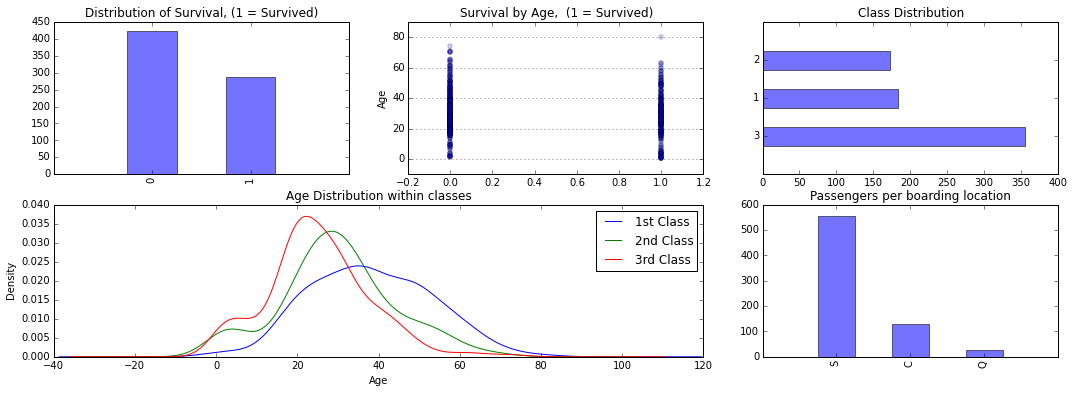

In [28]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

## how to plot the age of childern distribution??

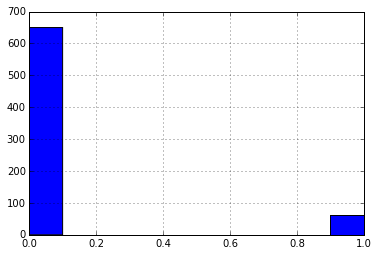

In [34]:
df['Age'].map(lambda x: x<10).hist()

In [37]:
df['Age'].value_counts().order().head(10)

34.50    1
20.50    1
14.50    1
55.50    1
0.67     1
0.92     1
24.50    1
36.50    1
53.00    1
80.00    1
dtype: int64

In [39]:
df['Age'].sort_index().head(10)

0     22
1     38
2     26
3     35
4     35
6     54
7      2
8     27
9     14
10     4
Name: Age, dtype: float64

In [41]:
df['Age'].value_counts().sort_index().head(10)

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
1.00     7
2.00    10
3.00     6
4.00    10
5.00     4
dtype: int64

In [42]:
df['Age'].map(lambda x: x< 10).value_counts().sort_index()

False    650
True      62
dtype: int64

In [49]:
age_less_than10 = df['Age'].map(lambda x: x<10)
df[df['Age'].map(lambda x: x<10)].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.0750,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,16.7000,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,29.1250,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,21.0750,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,41.5792,C
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,39.6875,S
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,27.7500,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,27.9000,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,29.0000,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,31.2750,S


### Exploratory Visualization:

The point of this competition is to predict if an individual will survive based on the features in the data like:
 
 * Traveling Class (called pclass in the data)
 * Sex 
 * Age
 * Fare Price

Let’s see if we can gain a better understanding of who survived and died. 


First let’s plot a bar graph of those who Survived Vs. Those who did not.


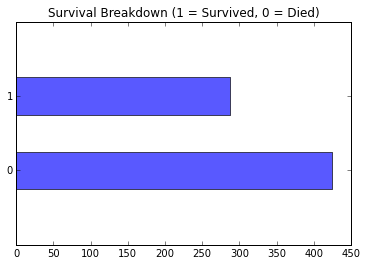

In [7]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

### Now let’s tease more structure out of the data,
### Let’s break the previous graph down by gender


(-1, 2)

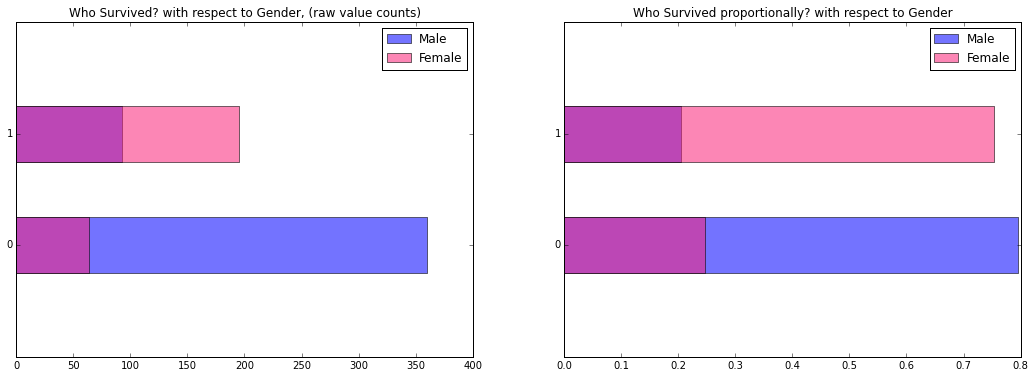

In [8]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

Here it’s clear that although more men died and survived in raw value counts, females had a greater survival rate proportionally (~25%), than men (~20%)

#### Great! But let’s go down even further:
Can we capture more of the structure by using Pclass? Here we will bucket classes as lowest class or any of the high classes (classes 1 - 2). 3 is lowest class. Let’s break it down by Gender and what Class they were traveling in.


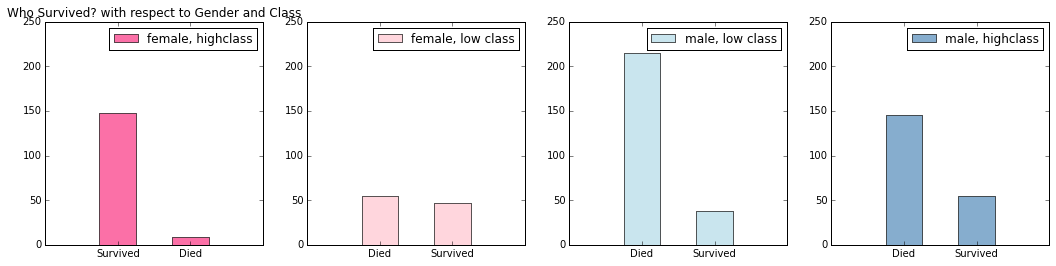

In [9]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

Awesome! Now we have a lot more information on who survived and died in the tragedy. With this deeper understanding, we are better equipped to create better more insightful models. This is a typical process in interactive data analysis. First you start small and understand the most basic relationships and slowly increment the complexity of your analysis as you discover more and more about the data you’re working with. Below is the progression of process laid out together:

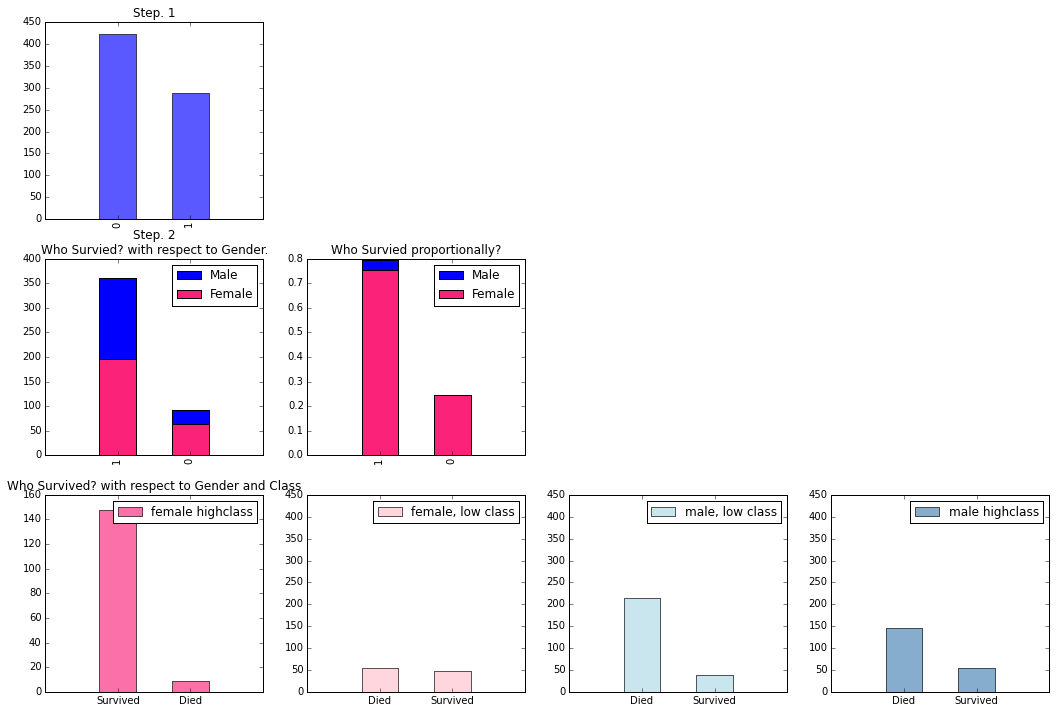

In [10]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survied? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

I've done my best to make the plotting code readable and intuitive, but if you’re looking for a more detailed look on how to start plotting in matplotlib, check out this beautiful notebook [here](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb). 

Now that we have a basic understanding of what we are trying to predict, let’s predict it.
## Supervised Machine Learning
#### Logistic Regression:


#### The skinny, as explained by yours truly:
Our competition wants us to predict a binary outcome. That is, it wants to know whether some will die, (represented as a 0), or survive, (represented as 1). A good place to start is to calculate the probability that an individual observation, or person, is likely to be a 0 or 1. That way we would know the chance that someone survives, and could start making somewhat informed perdictions. If we did, we'd get results like this:: 

![pred](https://raw.github.com/agconti/kaggle-titanic/master/images/calc_prob.png) 

(*Y axis is the probability that someone survives, X axis is the passenger’s number from 1 to 891.*)

While that information is useful it doesn’t let us know whether someone ended up alive or dead. It just lets us know the chance that they will survive or die. We still need to translate these probabilities into the binary decision we’re looking for. But how? We could arbitrarily say that our survival cutoff is anyone with a probability of survival over 50%. In fact, this tactic would actually perform pretty well for our data and would allow you to make decently accurate predictions. Graphically it would look something like this:

![predwline](https://raw.github.com/agconti/kaggle-titanic/master/images/calc_prob_wline.png)

If you’re a betting man like me, you don’t like to leave everything to chance. What are the odds that setting that cutoff at 50% works? Maybe 20% or 80% would work better. Clearly we need a more exact way to make that cutoff. What can save the day? In steps the **Logistic Regression**. 

A logistic regression follows the all steps we took above but mathematically calculates the cutoff, or decision boundary (as stats nerds call it), for you. This way it can figure out the best cut off to choose, perhaps 50% or 51.84%, that most accurately represents the training data.

The three cells below show the process of creating our Logitist regression model, training it on the data, and examining its performance. 

First, we define our formula for our Logit regression. In the next cell we create a regression friendly dataframe that sets up boolean values for the categorical variables in our formula and lets our regression model know the types of inputs we're giving it. The model is then instantiated and fitted before a summary of the model's performance is printed. In the last cell we graphically compare the predictions of our model to the actual values we are trying to predict, as well as the residual errors from our model to check for any structure we may have missed.

In [11]:
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() lets our 
# regression know that those variables are categorical.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)' 
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

In [12]:
y,x = dmatrices(formula, data=df, return_type='dataframe')
y.head(10)

,Survived
0,0
1,1
2,1
3,1
4,0
6,0
7,0
8,1
9,1
10,1


In [13]:
x.head(10)

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Age,SibSp
0,1,0,1,1,0,1,22,1
1,1,0,0,0,0,0,38,1
2,1,0,1,0,0,1,26,0
3,1,0,0,0,0,1,35,1
4,1,0,1,1,0,1,35,0
6,1,0,0,1,0,1,54,0
7,1,0,1,1,0,1,2,3
8,1,0,1,0,0,1,27,0
9,1,1,0,0,0,0,14,1
10,1,0,1,0,0,1,4,1


In [14]:
# create a regression friendly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=df, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Wed, 30 Mar 2016   Pseudo R-squ.:                  0.3414
Time:                        08:19:32   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000         3.613     5.471
C(Pclass)[T.2]      -1.2673      0.299     -4.245      0.000        -1.852    -0.682
C(Pclass)[T.3]      -2.4966      0.296     -8.422      0.000        -3.078    -1.916
C(Sex)[T.male]      -2.6239      0.218    -12.060      0.000        -3.050    -2.197
C(Embarked)[T.Q]    -0.8351      0.597     -1.398      0.162        -2.006     0.335
C(Embarked)[T.S]    -0.4254      0.271     -1.572      0.116        -0.956     0.105
Age                 -0.0436      0.008     -5.264      0.000        -0.060    -0.027
SibSp               -0.3697      0.123     -3.004      0.003        -0.611    -0.129
====================================================================================
"""

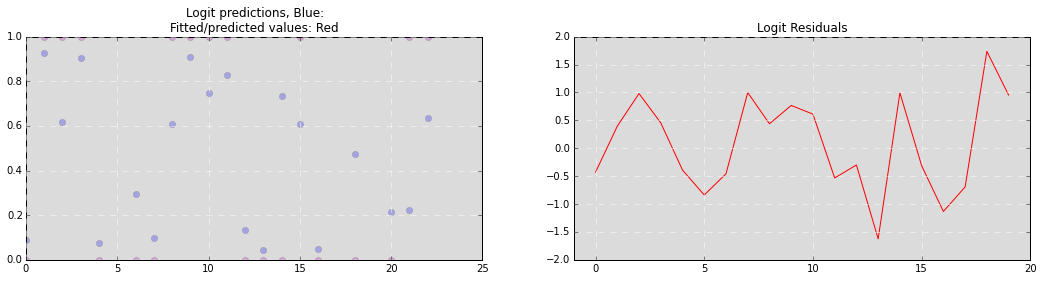

In [18]:
# Plot Predictions Vs Actual
plt.figure(figsize=(18,4));
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(x)
plt.plot(x.index[0:20], ypred[0:20], 'bo', x.index[0:20], y[0:20], 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev[0:20], 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev[0:20]))
plt.title('Logit Residuals');

## So how well did this work?
Lets look at the predictions we generated graphically:

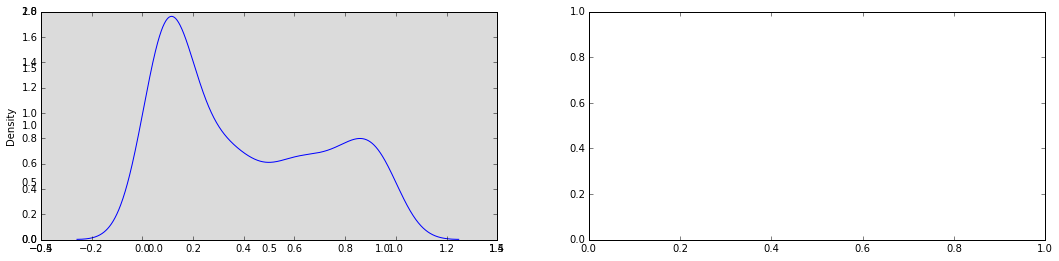

In [19]:
fig = plt.figure(figsize=(18,9), dpi=1600)
a = .2
fig.add_subplot(221)
s = pd.Series(res.predict())
s.plot(kind='kde')
fig.add_subplot(222)
fig.add_subplot(221, axisbg="#DBDBDB")
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)


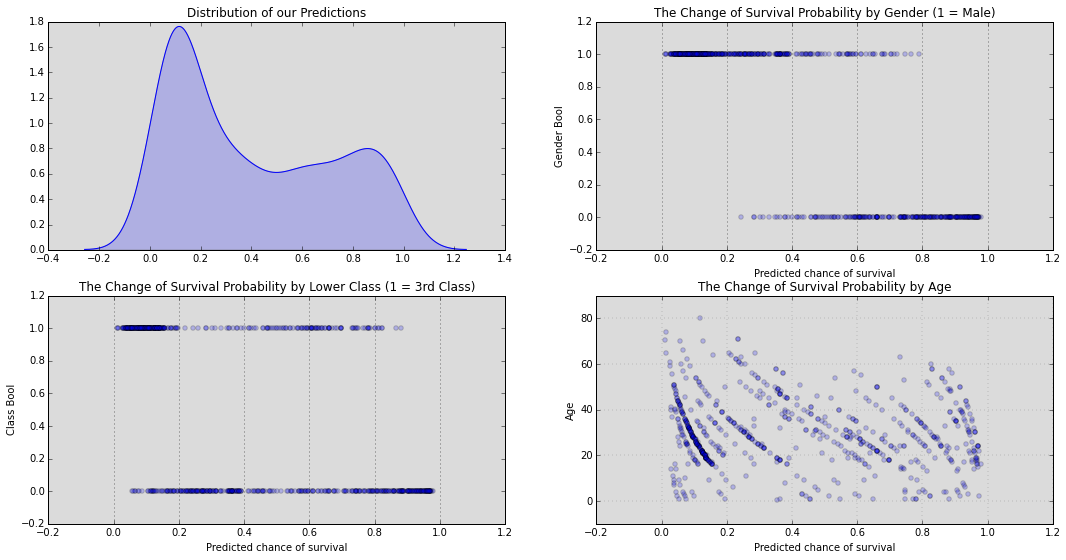

In [20]:
fig = plt.figure(figsize=(18,9), dpi=1600)
a = .2

# Below are examples of more advanced plotting. 
# It it looks strange check out the tutorial above.
fig.add_subplot(221, axisbg="#DBDBDB")
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=a)
plt.title("Distribution of our Predictions")

fig.add_subplot(222, axisbg="#DBDBDB")
plt.scatter(res.predict(),x['C(Sex)[T.male]'] , alpha=a)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Gender Bool")
plt.title("The Change of Survival Probability by Gender (1 = Male)")

fig.add_subplot(223, axisbg="#DBDBDB")
plt.scatter(res.predict(),x['C(Pclass)[T.3]'] , alpha=a)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class (1 = 3rd Class)")

fig.add_subplot(224, axisbg="#DBDBDB")
plt.scatter(res.predict(),x.Age , alpha=a)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

### Now lets use our model to predict the test set values and then save the results so they can be outputed to Kaggle
### Read the test data

In [21]:
test_data = pd.read_csv("data/test.csv")

### Examine our dataframe

In [22]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Add our independent variable to our test data. (It is usually left blank by Kaggle because it is the value you are trying to predict.)

In [23]:
test_data['Survived'] = 1.23

Our binned results data:

In [24]:
results 

{'Logit': [<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0xabedcf8>,
  'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)']}

In [25]:
def get_dataframe_intersection(df, comparator1, comparator2):
    """
    Return a dataframe with only the columns found in a comparative dataframe.

    Parameters
    ----------
    comparator1: DataFrame
        DataFrame to preform comparison on.
    comparator2: DataFrame
        DataFrame to compare with.

    Returns
    -------
    DataFrame:
        Data frame with columns not found in comparator dropped.

    """
    to_drop = list((c for c in comparator1 if c not in comparator2))
    return df.drop(to_drop, axis=1)


def get_dataframes_intersections(df1, comparator1, df2, comparator2):
    """
    Return DataFrames with the intersection of their column values.

    Parameters
    ----------
    comparator1: DataFrame
        DataFrame to preform comparison on.
    comparator2: DataFrame
        DataFrame to compare with.

    Returns
    -------
    Tuple:
        The resultingDataframe with columns not found in comparator dropped.

    """
    comparator1 = get_dataframe_intersection(df1, comparator1, comparator2)
    comparator2 = get_dataframe_intersection(df2, comparator2, comparator1)
    return comparator1, comparator2


def predict(test_data, results, model_name):
    """
    Return predictions of based on model resutls.

    Parameters
    ----------
    test_data: DataFrame
        should be test data you are trying to predict
    results: dict
        should be dict of your models results wrapper and the formula used
        to produce it.
            ie.
            results['Model_Name'] = {
            [<statsmodels.regression.linear_model.RegressionResultsWrapper> , 
            "Price ~ I(Supply, Demand)]
            }
    model_name: str
        should be the name of your model. You can iterate through the results dict.

    Returns
    -------
    NumPy array
        Predictions in a flat NumPy array.

    Example
    -------
    results = {'Logit': [<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x117896650>,
               'survived ~ C(pclass) + C(sex) + age + sibsp  + C(embarked)']}
    compared_resuts = predict(test_data, results, 'Logit')

    """
    model_params = DataFrame(results[model_name][0].params)
    formula = results[model_name][1]

    # Create regression friendly test DataFrame
    yt, xt = dmatrices(formula, data=test_data, return_type='dataframe')
    xt, model_params = get_dataframes_intersections(xt, xt.columns,
                                                    model_params, model_params.index)
    # Convert to NumPy arrays for performance
    model_params = np.asarray(model_params)
    yt = np.asarray(yt)
    yt = yt.ravel()
    xt = np.asarray(xt)

    # Use our models to create predictions
    row, col = xt.shape
    model_parameters = model_params.ravel()
    model_array = list((model_parameters for parameter in range(row)))
    model_array = np.asarray(model_array)

    # Multiply matrix together
    predictions = np.multiply(xt, model_array)
    predictions = np.sum(predictions, axis=1)
    return predictions


In [26]:
model_params = DataFrame(results['Logit'][0].params)
formula = results['Logit'][1]
yt, xt = dmatrices(formula, data=test_data, return_type='dataframe')
xt, model_params = get_dataframes_intersections(xt, xt.columns,
                                                    model_params, model_params.index)

    # Convert to NumPy arrays for performance
model_params = np.asarray(model_params)
yt = np.asarray(yt)
yt = yt.ravel()
xt = np.asarray(xt)

# Use our models to create predictions
row, col = xt.shape
model_parameters = model_params.ravel()
model_array = list((model_parameters for parameter in range(row)))
model_array = np.asarray(model_array)
predictions = np.multiply(xt, model_array)
predictions


array([[ 4.54230182, -0.        , -2.49664278, ..., -0.        ,
        -1.50545497, -0.        ],
       [ 4.54230182, -0.        , -2.49664278, ..., -0.42541379,
        -2.05090967, -0.3697092 ],
       [ 4.54230182, -1.26732122, -0.        , ..., -0.        ,
        -2.70545531, -0.        ],
       ..., 
       [ 4.54230182, -0.        , -2.49664278, ..., -0.42541379,
        -1.22181853, -0.        ],
       [ 4.54230182, -0.        , -0.        , ..., -0.        ,
        -1.70181866, -0.        ],
       [ 4.54230182, -0.        , -2.49664278, ..., -0.42541379,
        -1.68000047, -0.        ]])

In [27]:
model_params = np.asarray(model_params)
model_params
model_parameters = model_params.ravel()
model_parameters
row, col = xt.shape
model_array = list((model_parameters for parameter in range(row)))


In [28]:
# Use your model to make prediction on our test set. 
compared_resuts = ka.predict(test_data, results, 'Logit')
compared_resuts = Series(compared_resuts)  # convert our model to a series for easy output

NameError: name 'ka' is not defined

In [29]:
# output and submit to kaggle
compared_resuts.to_csv("data/output/logitregres.csv")

NameError: name 'compared_resuts' is not defined

### Results as scored by Kaggle: RMSE = 0.77033  That result is pretty good. ECT ECT ECT

In [30]:
# Create an acceptable formula for our machine learning algorithms
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

### Support Vector Machine (SVM)


## From me
**The answer:**
We could transform our logit equation from expressing a linear relationship like so:

$survived  = \beta_0 + \beta_1pclass + \beta_2sex + \beta_3age + \beta_4sibsp + \beta_5parch + \beta_6embarked$

Which we'll represent for convenience as: 
$y = x$
		

to a expressing a linear expression of a non-linear relationship: 
$\log(y) = \log(x)$

By doing this we're not breaking the rules. Logit models are *only* efficient at modeling linear relationships, so we're just giving it a linear relationship of a non-linear thing. 

An easy way to visualize this by looking at a graph an exponential relationship. Like the graph of $x^3$:

![x3](https://raw.github.com/agconti/kaggle-titanic/master/images/x3.png)

Here its obvious that this is not linear. If used it as an equation for our logit model, $y = x^3$; we would get bad results. But if we transformed it by taking the log  of our equation, $\log(y) = \log(x^3)$. We would get a graph like this:

![loglogx3](https://raw.github.com/agconti/kaggle-titanic/master/images/loglogx3.png)

That looks pretty linear to me. 

This process of transforming models so that they can be better expressed in a different mathematical plane is exactly what the Support Vector Machine does for us. The math behind how it does that is not trivial, so if your interested; put on your reading glasses and head over [here](http://dustwell.com/PastWork/IntroToSVM.pdf). Below is the process of implementing a SVM model and examining the results after the SVM transforms our equation into three different mathematical plains. The first is linear, and is similar to our logic model. Next is an exponential, polynomial, transformation and finally a blank transformation.


(712, 1)
[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]
(712,)
[ 0.  1.  1.  1.  0.  0.  0.  1.  1.  1.]


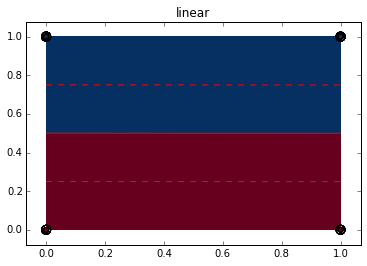

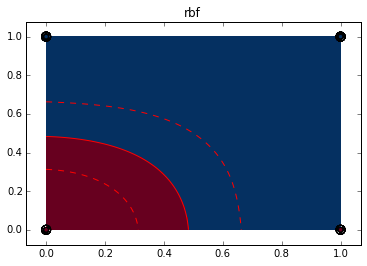

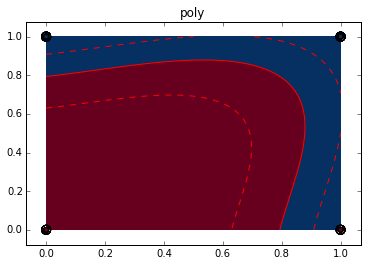

In [31]:
# set plotting parameters
plt.figure(figsize=(8,6))

# create a regression friendly data frame
y, x = dmatrices(formula_ml, data=df, return_type='matrix')

# select which features we would like to analyze
# try chaning the selection here for diffrent output.
# Choose : [2,3] - pretty sweet DBs [3,1] --standard DBs [7,3] -very cool DBs,
# [3,6] -- very long complex dbs, could take over an hour to calculate! 
feature_1 = 2
feature_2 = 3

X = np.asarray(x)
#print(type(X))
X = X[:,[feature_1, feature_2]]  


y = np.asarray(y)
# needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
print(y.shape)
print(y[0:10])
y = y.flatten()
print(y.shape)
print(y[0:10])

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)

X = X[order]
y = y[order].astype(np.float)

# do a cross validation
nighty_precent_of_sample = int(.9 * n_sample)
X_train = X[:nighty_precent_of_sample]
y_train = y[:nighty_precent_of_sample]
X_test = X[nighty_precent_of_sample:]
y_test = y[nighty_precent_of_sample:]

# create a list of the types of kerneks we will use for your analysis
types_of_kernels = ['linear', 'rbf', 'poly']

# specify our color map for plotting the results
color_map = plt.cm.RdBu_r

# fit the model
for fig_num, kernel in enumerate(types_of_kernels):
    clf = svm.SVC(kernel=kernel, gamma=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=color_map)

    # circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=color_map)
    plt.contour(XX, YY, Z, colors=['r', 'r', 'r'], linestyles=['--', '-', '--'],
               levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()

D:\Program Files (x86)\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


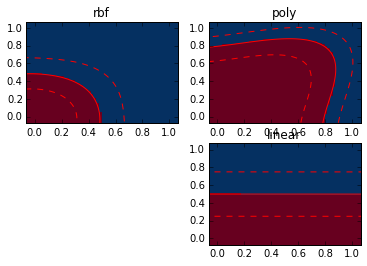

In [32]:
type_of_kernel = ['linear','rbf','poly']
color_map = plt.cm.RdBu_r

for fig_num, kernel in enumerate(type_of_kernel):
    clf = svm.SVC(kernel=kernel, gamma=3)
    clf.fit(X_train, y_train)

    #circle out the trainning data
    plt.subplot(2,2,fig_num)
    plt.scatter(X_train[:,0], X_train[:,1])
    
    #put the result to color map
    x_min, x_max = X_train.min()-1, X_train.max() + 1
    y_min, y_max = y_train.min()-1, y_train.max() + 1
    
    step = .02
    XX, YY = np.meshgrid(np.arange(x_min,x_max,step), np.arange(y_min, y_max, step))
    
    plt.axis('tight')
    #The distance between the sample and seperate hyperplane
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=color_map)
    plt.contour(XX, YY, Z, colors=['r', 'r', 'r'], linestyles=['--', '-', '--'],
               levels=[-.5, 0, .5])
    plt.title(kernel)
    
    
    
    
